In [35]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


In [36]:
df=pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


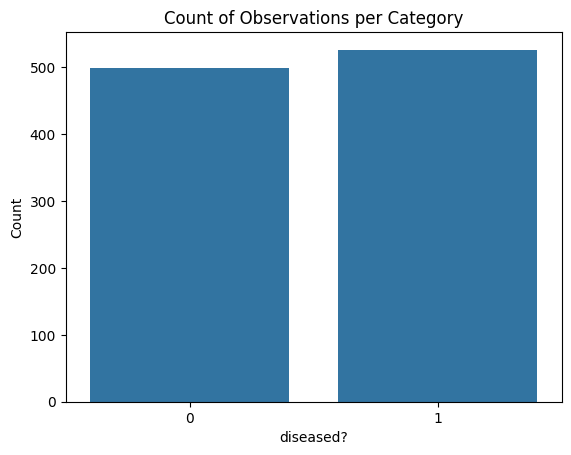

In [37]:
sns.countplot(x='target', data=df)
plt.title('Count of Observations per Category')
plt.xlabel('diseased?')
plt.ylabel('Count')
plt.show()

In [38]:
import sklearn as skl
scaler=skl.preprocessing.StandardScaler()
x=df.drop(['target'], axis=1)
y=df['target']
x_scaled=scaler.fit_transform(x)
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122


In [39]:
x_scaled=pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


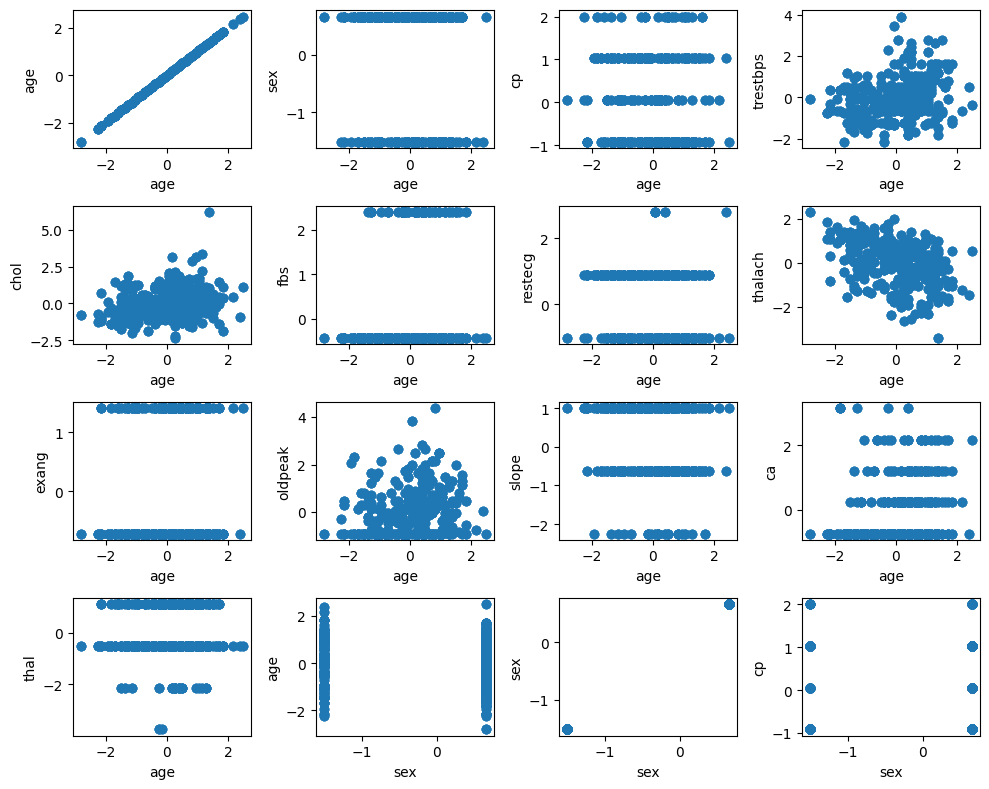

In [41]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4,4, figsize=(10, 8))
axs = axs.flatten()

plot_idx = 0
for col1 in x_scaled.columns:
    for col in x.columns:
        if plot_idx >= len(axs):
            break
        axs[plot_idx].scatter(x_scaled[col1], x_scaled[col])
        axs[plot_idx].set_xlabel(col1)
        axs[plot_idx].set_ylabel(col)
        plot_idx += 1

plt.tight_layout()
plt.show()

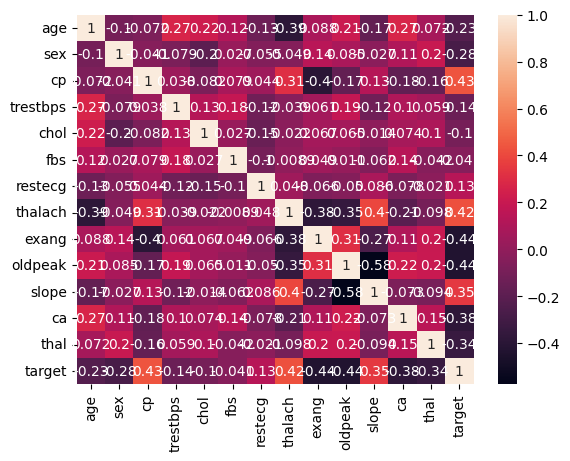

In [42]:
matrix=df.corr()
sns.heatmap(matrix, annot=True)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [45]:
model=skl.linear_model.LogisticRegression(penalty='l2',  dual=False, tol=0.0001, C=1.0, fit_intercept=True,solver='lbfgs')
model.fit(x_train, y_train)

LogisticRegression()

In [46]:
model.coef_

array([[-0.00675447, -0.83892961,  0.87734059, -0.31825218, -0.46391948,
        -0.06309728,  0.14068409,  0.65487087, -0.4178263 , -0.78729834,
         0.34935676, -0.84327806, -0.67423896]])

accuracy_score 0.7951219512195122
f1 score 0.8108108108108109
precision_score 0.7563025210084033


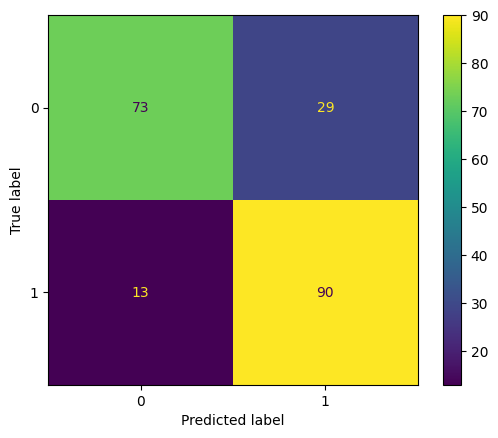

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

print("accuracy_score",accuracy_score(y_test, model.predict(x_test)))
print("f1 score", f1_score(y_test, model.predict(x_test)))
print("precision_score",precision_score(y_test, model.predict(x_test)))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, model.predict(x_test)), display_labels=model.classes_).plot()
plt.show()

In [50]:
#Push to github
!git clone https://github.com/AlaaBouhaouel/ML_projects.git


Cloning into 'ML_projects'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 48 (delta 6), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (48/48), 1.77 MiB | 4.13 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [51]:
%cd ML_projects
!mkdir -p Disease_det
!mv /content/Heart_Disease_Prediction.ipynb Disease_det/Heart_Disease_Prediction/


/content/ML_projects
mv: cannot stat '/content/Student_depression.ipynb': No such file or directory
